## Forecasting the Sales of a champagne selling company using ARIMA and SARIMAX 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Forecasting\ARIMA-And-Seasonal-ARIMA-master

30-08-2022  09:46    <DIR>          .
30-08-2022  09:46    <DIR>          ..
06-08-2022  15:05    <DIR>          .ipynb_checkpoints
30-08-2022  09:46           180,726 ARIMA.ipynb
19-03-2020  11:49             1,598 perrin-freres-monthly-champagne-.csv
19-03-2020  11:49                26 README.md
06-08-2022  15:05           360,797 Untitled.ipynb
               4 File(s)        543,147 bytes
               3 Dir(s)  125,159,563,264 bytes free


# Data reading and preprocessing

In [4]:
df=pd.read_csv("perrin-freres-monthly-champagne-.csv")

In [5]:
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [6]:
# Removing last 2 rows
df.drop(106,inplace=True)

In [7]:
df.drop(105,inplace=True)

In [8]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
# Renaming the columns
df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'},inplace=True)

In [10]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [11]:
# Converting "Month" in the form of "datetime"
df['Month']=pd.to_datetime(df['Month'])

In [12]:
df

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [14]:
# Converting Month to index
df.set_index('Month',inplace=True)

In [15]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [16]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Visualizing the data

<AxesSubplot:xlabel='Month'>

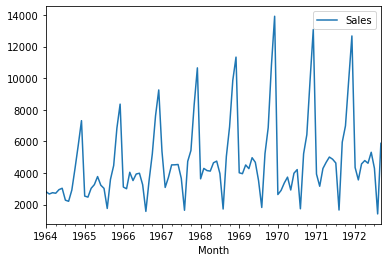

In [17]:
df.plot()

In [40]:
# Testing for "stationary"
# NULL HYPOTHESIS--> The data is not-stationary
# ALTERNATIVE HYPOTHESIS--> The data is stationary

# If p-value<=0.05 ==> Reject Null Hypothesis --> Data is stationary
# If p-value>0.05 ==> Accept Null Hypothesis --> Data is notbstationary

from statsmodels.tsa.stattools import adfuller 

In [19]:
result=adfuller(df['Sales'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'{key}, {value}')


ADF Statistic: -1.8335930563276195
p-value: 0.3639157716602467
Critial Values:
1%, -3.502704609582561
Critial Values:
5%, -2.8931578098779522
Critial Values:
10%, -2.583636712914788


The p_value is greater than 0.05 and hence we will accept the Null Hypothesis.
The data is Not Stationary

# Perform Differencing to make the data Stationary

In [20]:
df['Sales 1st difference']=df['Sales']-df['Sales'].shift(1)

In [21]:
df.head()

,Sales,Sales 1st difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [22]:
df['Seasonal 1st difference']=df['Sales']-df['Sales'].shift(12)

In [23]:
df.head()

,Sales,Sales 1st difference,Seasonal 1st difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [24]:
# Adfuller test for Sales 1st difference

result=adfuller(df['Sales 1st difference'].dropna())

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'{key}, {value}')

ADF Statistic: -7.189896448051006
p-value: 2.51962044738698e-10
Critial Values:
1%, -3.503514579651927
Critial Values:
5%, -2.893507960466837
Critial Values:
10%, -2.583823615311909


The p-value is less than 0.05 hence we reject the Null Hypothesis. The data is Stationary.

In [25]:
# Adfuller test for Seasonal 1st difference

result=adfuller(df['Seasonal 1st difference'].dropna())

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'{key}, {value}')

ADF Statistic: -7.626619157213166
p-value: 2.0605796968136632e-11
Critial Values:
1%, -3.503514579651927
Critial Values:
5%, -2.893507960466837
Critial Values:
10%, -2.583823615311909


The p-value is less than 0.05 hence we reject the Null Hypothesis. The data is Stationary.

<AxesSubplot:xlabel='Month'>

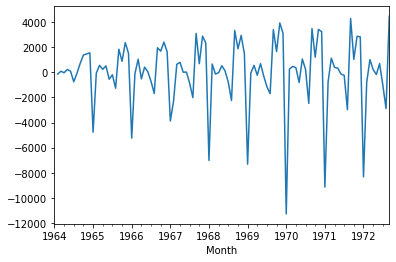

In [26]:
# Plotting the data
df['Sales 1st difference'].plot()

<AxesSubplot:xlabel='Month'>

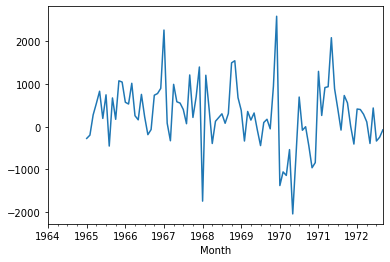

In [27]:
df['Seasonal 1st difference'].plot()

# ACF and PACF Plots

In [28]:
# ACF plot will give the value of "p" parameter (Auto Regressive model)
# PACF plot will give the value of "q" parameter (Moving Average model)

In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

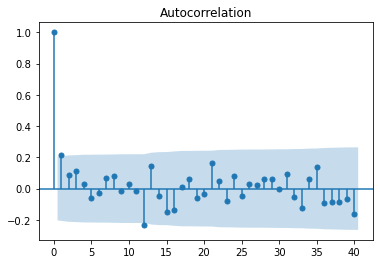

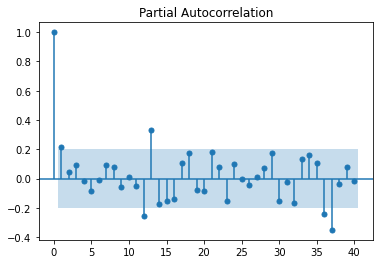

In [30]:
# ACF and PACF plot for Seasonal 1st difference

fig1=plot_acf(df['Seasonal 1st difference'].dropna(),lags=40)
fig2=plot_pacf(df['Seasonal 1st difference'].dropna(),lags=40)

1. From ACF plot we will get the value of q. q=1
2. From PACF plot we will get the value of p. p=1

# ARIMA model

ARIMA model with order p=1, q=1, d=1

In [42]:
from statsmodels.tsa.arima.model import ARIMA

In [47]:
arima_model=ARIMA(df['Sales'],order=(1,1,1))
arima_model_fit=arima_model.fit()

<AxesSubplot:xlabel='Month'>

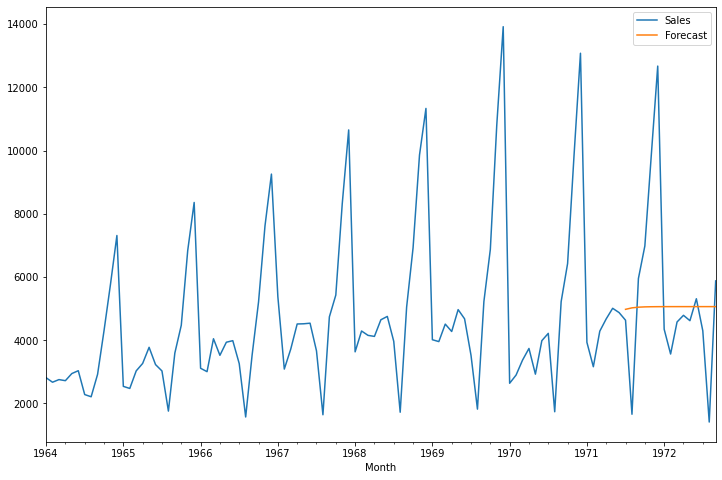

In [49]:
df['Forecast']=arima_model_fit.predict(start=90,end=104,dynamic=True)
df[['Sales','Forecast']].plot(kind='line',figsize=(12,8))

ARIMA is not giving good results, hence we will try SARIMAX.

# SARIMAX model

SARIMAX model with order p=1, q=1, d=1, s=12

In [51]:
from statsmodels.tsa.statespace import sarimax

In [53]:
sarima_model=sarimax.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
sarima_model_fit=sarima_model.fit()

<AxesSubplot:xlabel='Month'>

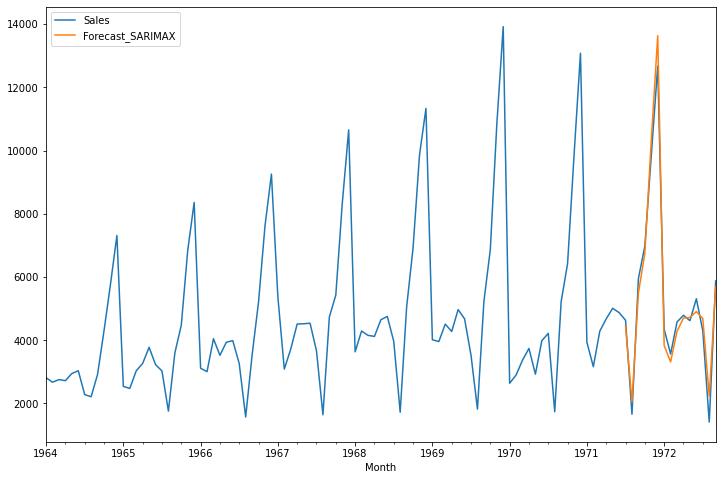

In [54]:
df['Forecast_SARIMAX']=sarima_model_fit.predict(start=90,end=104,dynamic=True)
df[['Sales','Forecast_SARIMAX']].plot(kind='line',figsize=(12,8))

SARIMAX model is giving good results.

# Conclusion

From the output above:

- The blue line is the actual monthly sales.
- The orange line is the forecast sales.
- The time series model had made correct predictions since the two lines are close together. The SARIMA model has performed well as compared to the ARIMA model.